In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rsna = pd.read_csv("RSNA/dataframe.csv")
df = pd.read_csv("RSNA/stage_2_train_labels.csv")
shnz = pd.read_csv("SHENZEN/dataframe.csv")

In [3]:
shnz.head()

   Unnamed: 0                                                img  gender  age  \
0           0  C:\Users\Patryk\Desktop\Kod\WB-DATA\SHENZEN/CX...    male   45   
1           1  C:\Users\Patryk\Desktop\Kod\WB-DATA\SHENZEN/CX...    male   63   
2           2  C:\Users\Patryk\Desktop\Kod\WB-DATA\SHENZEN/CX...  female   48   
3           3  C:\Users\Patryk\Desktop\Kod\WB-DATA\SHENZEN/CX...    male   58   
4           4  C:\Users\Patryk\Desktop\Kod\WB-DATA\SHENZEN/CX...    male   28   

  condition  img_height  img_width  
0         H        2919       3000  
1         H        2951       3000  
2         H        2945       2987  
3         H        2933       3000  
4         H        2933       3000  


Usuwamy zbędne kolumny.

In [4]:
shnz.drop(['Unnamed: 0', 'img_height', 'img_width'], axis=1, inplace=True)

In [5]:
shnz.describe(include='all')

,img,gender,age,condition
count,662,662,662.000000,662
unique,662,3,NaN,2
top,C:\Users\Patryk\Desktop\Kod\WB-DATA\SHENZEN/CX...,male,NaN,NH
freq,1,449,NaN,336
mean,NaN,NaN,35.575529,NaN
std,NaN,NaN,14.709271,NaN
min,NaN,NaN,1.000000,NaN
25%,NaN,NaN,26.000000,NaN
50%,NaN,NaN,33.000000,NaN
75%,NaN,NaN,43.000000,NaN


In [6]:
shnz['gender'].value_counts()

male      449
female    210
femal       3
Name: gender, dtype: int64

Poprawiamy błąd w nazwie płci.

In [7]:
shnz.loc[shnz["gender"] == "femal", "gender"] = "female"

Kolumny dotyczące rozmiarów zdjęcia nie przydadzą się dla modelu.

In [8]:
shnz['condition'] = (shnz['condition'] == 'NH').astype('int8')

Dla niezdrowych pacjentów przypisujemy klase 1, dla zdrowych 0.

In [9]:
shnz['gender'] = (shnz['gender'] == 'male').astype('int8')

Płec również oznaczymy 0 lub 1.

In [10]:
shnz.head()

,img,gender,age,condition
0,C:\Users\Patryk\Desktop\Kod\WB-DATA\SHENZEN/CX...,1,45,0
1,C:\Users\Patryk\Desktop\Kod\WB-DATA\SHENZEN/CX...,1,63,0
2,C:\Users\Patryk\Desktop\Kod\WB-DATA\SHENZEN/CX...,0,48,0
3,C:\Users\Patryk\Desktop\Kod\WB-DATA\SHENZEN/CX...,1,58,0
4,C:\Users\Patryk\Desktop\Kod\WB-DATA\SHENZEN/CX...,1,28,0


<AxesSubplot:>

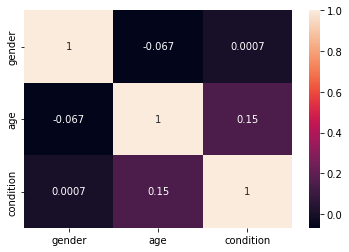

In [11]:
sns.heatmap(shnz.corr(), annot=True)

In [12]:
rsna = pd.merge(rsna, df, left_on="ID", right_on="patientId")

In [13]:
rsna.head()

,ID,Sex,Age,View_position,Phot_int,Pixel_spacing,Img,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,F,51,PA,MONOCHROME2,"[0.14300000000000002, 0.14300000000000002]",C:\Users\Patryk\Desktop\Kod\WB-DATA\RSNA\stage...,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,000924cf-0f8d-42bd-9158-1af53881a557,F,19,AP,MONOCHROME2,"[0.139, 0.139]",C:\Users\Patryk\Desktop\Kod\WB-DATA\RSNA\stage...,000924cf-0f8d-42bd-9158-1af53881a557,NaN,NaN,NaN,NaN,0
2,000db696-cf54-4385-b10b-6b16fbb3f985,F,25,AP,MONOCHROME2,"[0.168, 0.168]",C:\Users\Patryk\Desktop\Kod\WB-DATA\RSNA\stage...,000db696-cf54-4385-b10b-6b16fbb3f985,316.0,318.0,170.0,478.0,1
3,000db696-cf54-4385-b10b-6b16fbb3f985,F,25,AP,MONOCHROME2,"[0.168, 0.168]",C:\Users\Patryk\Desktop\Kod\WB-DATA\RSNA\stage...,000db696-cf54-4385-b10b-6b16fbb3f985,660.0,375.0,146.0,402.0,1
4,000fe35a-2649-43d4-b027-e67796d412e0,M,40,AP,MONOCHROME2,"[0.171, 0.171]",C:\Users\Patryk\Desktop\Kod\WB-DATA\RSNA\stage...,000fe35a-2649-43d4-b027-e67796d412e0,570.0,282.0,269.0,409.0,1


In [14]:
rsna.drop(['Phot_int', 'Pixel_spacing', 'patientId'], axis=1, inplace=True)

Wszystkie zdjęcia są MONOCHROME2 więc informacja jest zbędna.

In [15]:
rsna.describe(include='all')

,ID,Sex,Age,View_position,Img,x,y,width,height,Target
count,30227,30227,30227.000000,30227,30227,9555.000000,9555.000000,9555.000000,9555.000000,30227.000000
unique,26684,2,NaN,2,26684,NaN,NaN,NaN,NaN,NaN
top,76f71a93-8105-4c79-a010-0cfa86f0061a,M,NaN,AP,C:\Users\Patryk\Desktop\Kod\WB-DATA\RSNA\stage...,NaN,NaN,NaN,NaN,NaN
freq,4,17216,NaN,15297,4,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,46.797764,NaN,NaN,394.047724,366.839560,218.471376,329.269702,0.316108
std,NaN,NaN,16.892940,NaN,NaN,204.574172,148.940488,59.289475,157.750755,0.464963
min,NaN,NaN,1.000000,NaN,NaN,2.000000,2.000000,40.000000,45.000000,0.000000
25%,NaN,NaN,34.000000,NaN,NaN,207.000000,249.000000,177.000000,203.000000,0.000000
50%,NaN,NaN,49.000000,NaN,NaN,324.000000,365.000000,217.000000,298.000000,0.000000
75%,NaN,NaN,59.000000,NaN,NaN,594.000000,478.500000,259.000000,438.000000,1.000000


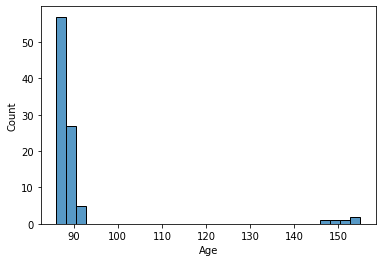

In [16]:
sns.histplot(x=rsna.loc[rsna['Age'] > 85, 'Age'], bins=30)
plt.show()

Jak widać jest zaledwie kilka błędnych danych więc można się ich pozbyć.

In [17]:
print(f"Usuwamy {len(rsna[rsna['Age'] > 100])} pacjentow starszych niż 100 lat")
rsna.drop(rsna[rsna['Age'] > 100].index, inplace=True)

Usuwamy 5 pacjentow starszych niż 100 lat


In [18]:
rsna['Sex'] = (rsna['Sex'] == 'M').astype('int8')
rsna['View_position'] = (rsna['View_position'] == 'AP').astype('int8')

In [19]:
rsna.head()

,ID,Sex,Age,View_position,Img,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,51,0,C:\Users\Patryk\Desktop\Kod\WB-DATA\RSNA\stage...,NaN,NaN,NaN,NaN,0
1,000924cf-0f8d-42bd-9158-1af53881a557,0,19,1,C:\Users\Patryk\Desktop\Kod\WB-DATA\RSNA\stage...,NaN,NaN,NaN,NaN,0
2,000db696-cf54-4385-b10b-6b16fbb3f985,0,25,1,C:\Users\Patryk\Desktop\Kod\WB-DATA\RSNA\stage...,316.0,318.0,170.0,478.0,1
3,000db696-cf54-4385-b10b-6b16fbb3f985,0,25,1,C:\Users\Patryk\Desktop\Kod\WB-DATA\RSNA\stage...,660.0,375.0,146.0,402.0,1
4,000fe35a-2649-43d4-b027-e67796d412e0,1,40,1,C:\Users\Patryk\Desktop\Kod\WB-DATA\RSNA\stage...,570.0,282.0,269.0,409.0,1


Brak wartości dla zmiennych x, y, width oraz height wynika z klasy 0, więc nie należy ich zmieniać.

<AxesSubplot:>

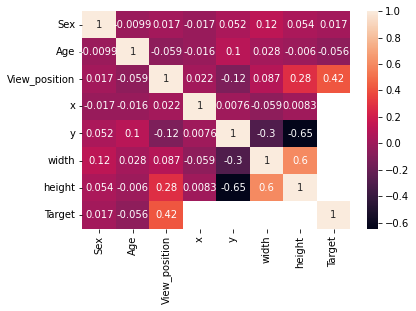

In [20]:
sns.heatmap(rsna.corr(), annot=True)

### skalowanie wartości

In [21]:
from sklearn.preprocessing import MinMaxScaler

Wiek rozkłada się normalnie, więc wystarczy MinMaxScaler

In [30]:
rsna['Age'] = MinMaxScaler().fit_transform(np.array(rsna['Age']).reshape(-1, 1))
rsna.head()

,ID,Sex,Age,View_position,Img,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,0,0.549451,0,C:\Users\Patryk\Desktop\Kod\WB-DATA\RSNA\stage...,NaN,NaN,NaN,NaN,0
1,000924cf-0f8d-42bd-9158-1af53881a557,0,0.197802,1,C:\Users\Patryk\Desktop\Kod\WB-DATA\RSNA\stage...,NaN,NaN,NaN,NaN,0
2,000db696-cf54-4385-b10b-6b16fbb3f985,0,0.263736,1,C:\Users\Patryk\Desktop\Kod\WB-DATA\RSNA\stage...,316.0,318.0,170.0,478.0,1
3,000db696-cf54-4385-b10b-6b16fbb3f985,0,0.263736,1,C:\Users\Patryk\Desktop\Kod\WB-DATA\RSNA\stage...,660.0,375.0,146.0,402.0,1
4,000fe35a-2649-43d4-b027-e67796d412e0,1,0.428571,1,C:\Users\Patryk\Desktop\Kod\WB-DATA\RSNA\stage...,570.0,282.0,269.0,409.0,1


In [31]:
shnz['age'] = MinMaxScaler().fit_transform(np.array(shnz['age']).reshape(-1, 1))
shnz.head()

,img,gender,age,condition
0,C:\Users\Patryk\Desktop\Kod\WB-DATA\SHENZEN/CX...,1,0.500000,0
1,C:\Users\Patryk\Desktop\Kod\WB-DATA\SHENZEN/CX...,1,0.704545,0
2,C:\Users\Patryk\Desktop\Kod\WB-DATA\SHENZEN/CX...,0,0.534091,0
3,C:\Users\Patryk\Desktop\Kod\WB-DATA\SHENZEN/CX...,1,0.647727,0
4,C:\Users\Patryk\Desktop\Kod\WB-DATA\SHENZEN/CX...,1,0.306818,0
